In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [7]:
df=pd.read_csv('adult.csv')

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [11]:
income_encode={'income': {'<=50K':0, '>50K': 1}}
df=df.replace(to_replace=income_encode)

In [12]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


# QD Model

In [13]:
X=df.drop(['income'], axis='columns')

In [14]:
y=df.income

In [15]:
ct=make_column_transformer((StandardScaler(), X.select_dtypes(include='number').columns), 
                           (OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include='object').columns), remainder='passthrough')

In [16]:
lr=LogisticRegression(solver='saga')

In [17]:
pl=make_pipeline(ct, lr)

In [18]:
cross_val_score(pl, X, y, cv=10).mean()

0.8332411140171349

# Visuallizations

### Pairwise Correlations between continuous variables

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


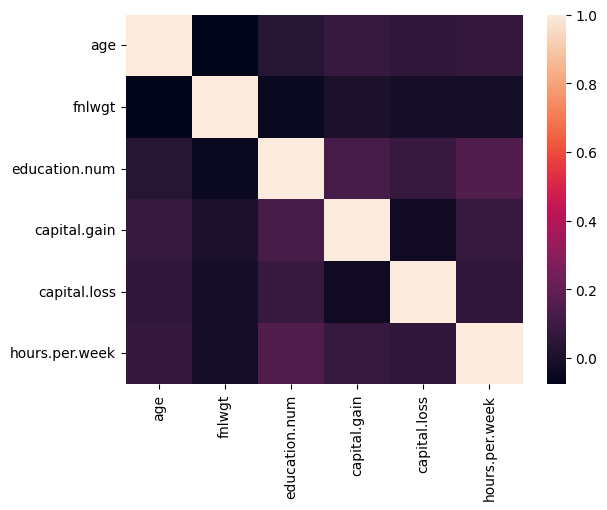

In [19]:
cor = X.select_dtypes(include='number').corr()
sns.heatmap(data=cor, cmap='rocket')
cor

### Correlation with y

In [20]:
corr=pd.concat([X, y], axis='columns').select_dtypes(include='number').corr().loc[:,['income']]

<AxesSubplot: >

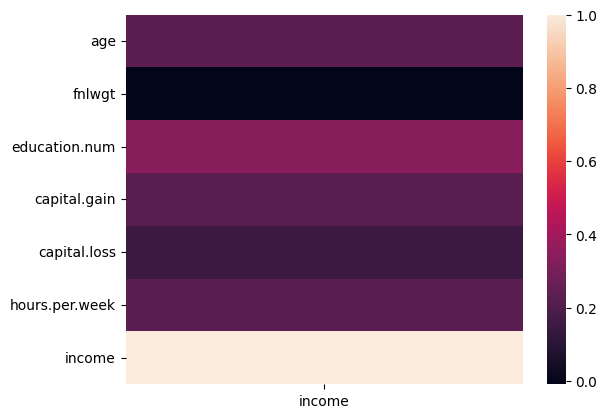

In [21]:
sns.heatmap(data=corr, cmap='rocket')

# Helper functions

In [22]:
def eval_model(model):
    pl=make_pipeline(ct, lr)
    evaluation=cross_val_score(pl, X, y, cv=10).mean()
    return evaluation

# Optimizing Linear Regression 

In [37]:
params={
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 150, 200, 250, 300]
       }

In [38]:
grid=GridSearchCV(LogisticRegression(), params, cv=10)

In [39]:
x_temp=ct.fit_transform(X)

In [40]:
grid.fit(x_temp, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150, 200, 250, 300],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [41]:
grid.best_score_

0.8350525969769139

In [42]:
grid.best_params_

{'max_iter': 100, 'solver': 'lbfgs'}

# Optimizing Random Forrest

In [32]:
params={
        'criterion' : ["gini", "entropy", "log_loss"],
        'max_features' : ["sqrt", "log2", None],
        
       }

In [33]:
grid = RandomizedSearchCV(RandomForestClassifier(), params, cv=5, n_iter=10)

In [34]:
grid.fit(x_temp, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None]})

In [35]:
grid.best_score_

0.8123526901970015

In [36]:
grid.best_params_

{'max_features': 'log2', 'criterion': 'gini'}